# Assignment 1 - Simplified Custom Object Detection

This notebook contains the required task for the first assignment of the Deep Network Development course. Read the task description and fill in the empty code cells. Each section represents an implementation stage of object detection: -from `loading and inspecting the dataset`; -to `implementing`, `training and evaluating a Convolutional Neural Network based architecture`. The sections are there to guide you but you do not have to follow them strictly.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it, and upload the final .ipynb file to [Canvas](https://canvas.elte.hu). If you are using this in Google Colab notebook, save it as .ipynb and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the .ipynb file.


## General Rules
Please check all the requirements listed on Canvas, but here are some general rules:
- Please select at least ANY 3 objects of choice. Try to pick unique objects. You may pick more, but less than 3 is not acceptable and results in losing points;
- While we do not require a high performance model, we still expect you to have a model that performs better than "random guessing" (i.e. for 3 objects, mAP should be better than 33%);
- Copying others' code will make you fail the assignment automatically, resulting in a 0;
- Not submitting anything results in a 0;
- Submitting something, as long as it is not an empty notebook, might result in a 1;
- **Deadline is October 25th Friday 11:59 PM** (strict, no late submission)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your name, Neptun ID, and task details below.

**Name:Homoki Márton János**  
**Neptun ID:PVCM4T**
**Network:Convolutional Neural Network**
**Objects:Plushie Duck,Plushie Bear,Plushie Fox**

## Task description

**Your task** is to train your own custom object detection model and compare its performance with an existing object detection model (i.e., YOLO). For that, you need to generate a synthetic dataset to train your own custom model and fine-tune an existing one. This is a simplified version of object detection, where each image must only contain a single object.

- There is no expectation of high performance, but **your metrics should show results better than random guessing, and your loss must decrease throughout the epochs**.

- We expect you to visualize the key metrics such as precision, recall, F1-score, mAP (mean average precision), IoU (Intersection over Union), and localization loss, in addition to monitoring the overall loss and its reduction across training. Use plots and visualizations (e.g., matplotlib, seaborn) to display metrics, losses, and predictions.

- You should implement techniques to avoid overfitting, such as Early Stopping, and save the best-performing model during training.

- Additionally, you can use **WandB (Weights and Biases)** or **TensorBoard** to track and visualize training progress, monitor the model's performance, and log metrics over time.

`Good luck!`

**In order to get your grade for the assignment, you must defend it by answering questions during the designated practice time.**

## Guidelines
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

# 0. Necessary Imports
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [2]:
# ADD YOUR CODE HERE
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# 1. DATASET
**For this assignment you are free to pick any 3 objects of your choice.** Please avoid offensive, inappropriate or violent objects.

### 1.1. Load objects

**Please select 3 or more objects.** After selecting the objects, **remove the background, keeping only the object itself**. You can do this manually, online, or by using code (this step is not part of the assignment evaluation).

As an example, the following objects were chosen (with the background removed using the Segment Anything Model):

In [24]:
# ADD YOUR CODE HERE

import urllib
from IPython.display import Image, display
# I Have chosen the following images 
display(Image(url='https://raw.githubusercontent.com/highpn/images/refs/heads/master/plushieduck-removebg-preview.png',width=200,height=200))
display(Image(url='https://raw.githubusercontent.com/highpn/images/refs/heads/master/plushiebear-removebg-preview.png',width=200,height=200))
display(Image(url='https://raw.githubusercontent.com/highpn/images/refs/heads/master/plushiefox-removebg-preview.png',width=200,height=200))


### 1.2. Load backgrounds

In order to train a custom object detection model, a dataset is needed. For this assignment, a synthetic dataset should be created by:

- **Inserting an object in a random position** on a background image.

**Therefore, collect a few background images from different locations** This can be done manually or via code.

It is recommended to use **icrawler** to automate the image collection process.


In [25]:
!pip install icrawler

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!mkdir background

mkdir: cannot create directory ‘background’: File exists


In case of any errors, try using a different crawler. You can use one of the following options:

```python
from icrawler.builtin import BaiduImageCrawler, BingImageCrawler, GoogleImageCrawler


In [2]:
from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(
    parser_threads=2,
    downloader_threads=4,
    storage={'root_dir': 'background'}
)

for keyword in ['futuristic city', 'circus', 'abbandoned theme park', 'chernobyl', 'nuclear powerplant','backrooms']:
    google_crawler.crawl(
        keyword=keyword, max_num=10, file_idx_offset='auto') #, min_size=(500, 500),)

#Some images may return an error, but icrawler tries to find other images regardless

2024-10-05 20:59:46,644 - INFO - icrawler.crawler - start crawling...
2024-10-05 20:59:46,644 - INFO - icrawler.crawler - starting 1 feeder threads...
2024-10-05 20:59:46,645 - INFO - feeder - thread feeder-001 exit
2024-10-05 20:59:46,645 - INFO - icrawler.crawler - starting 2 parser threads...
2024-10-05 20:59:46,647 - INFO - icrawler.crawler - starting 4 downloader threads...
2024-10-05 20:59:48,504 - INFO - parser - parsing result page https://www.google.com/search?q=futuristic+city&ijn=0&start=0&tbs=&tbm=isch
2024-10-05 20:59:48,647 - INFO - parser - no more page urls for thread parser-002 to parse
2024-10-05 20:59:48,647 - INFO - parser - thread parser-002 exit
2024-10-05 20:59:48,755 - INFO - downloader - image #1	https://images.travelandleisureasia.com/wp-content/uploads/sites/3/2023/04/11150621/Futuristic-Cities.jpg
2024-10-05 20:59:48,813 - INFO - downloader - image #2	https://www.bdcnetwork.com/sites/default/files/AdobeStock_624499925.jpg
2024-10-05 20:59:48,816 - INFO - dow

/background/000008.png


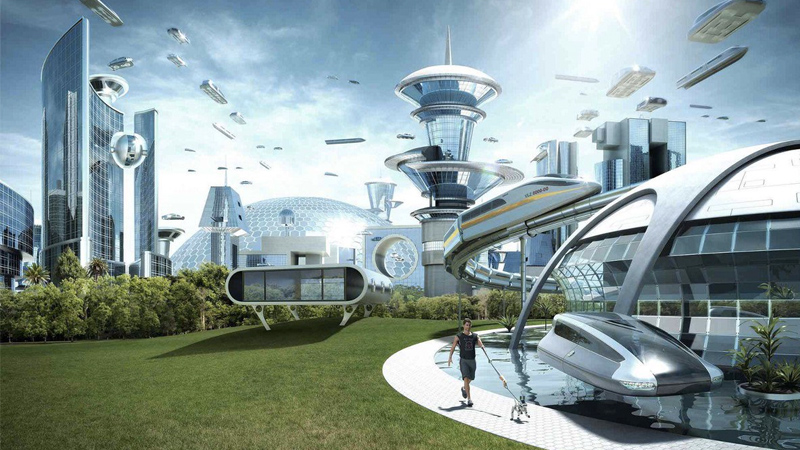

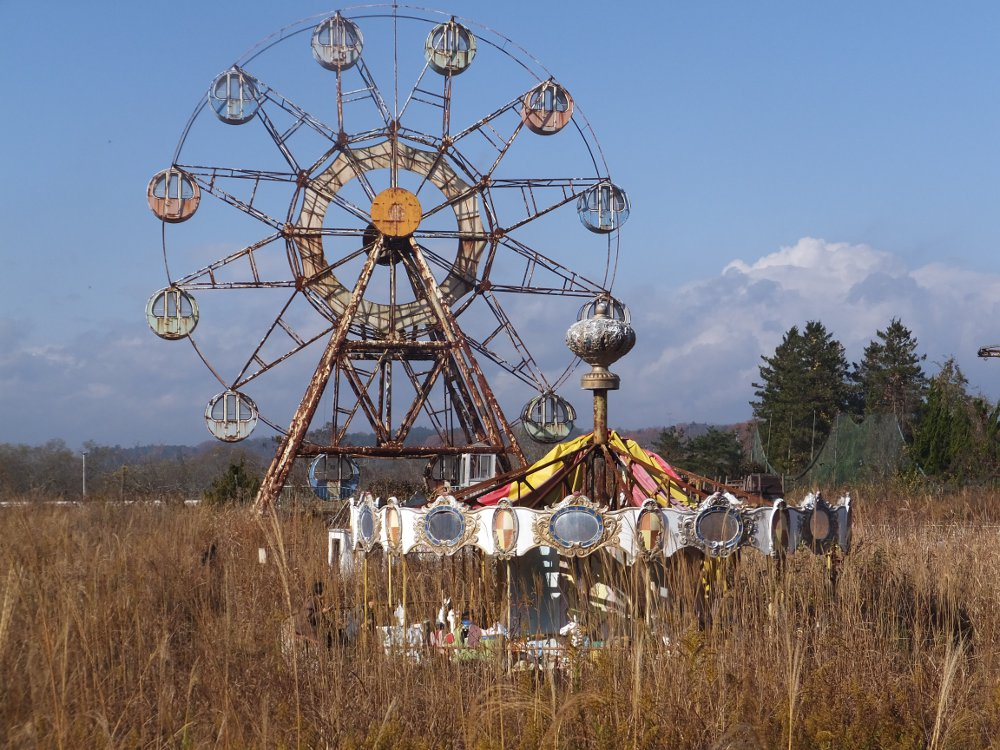

/background/000093.jpg
/background/000042.jpg


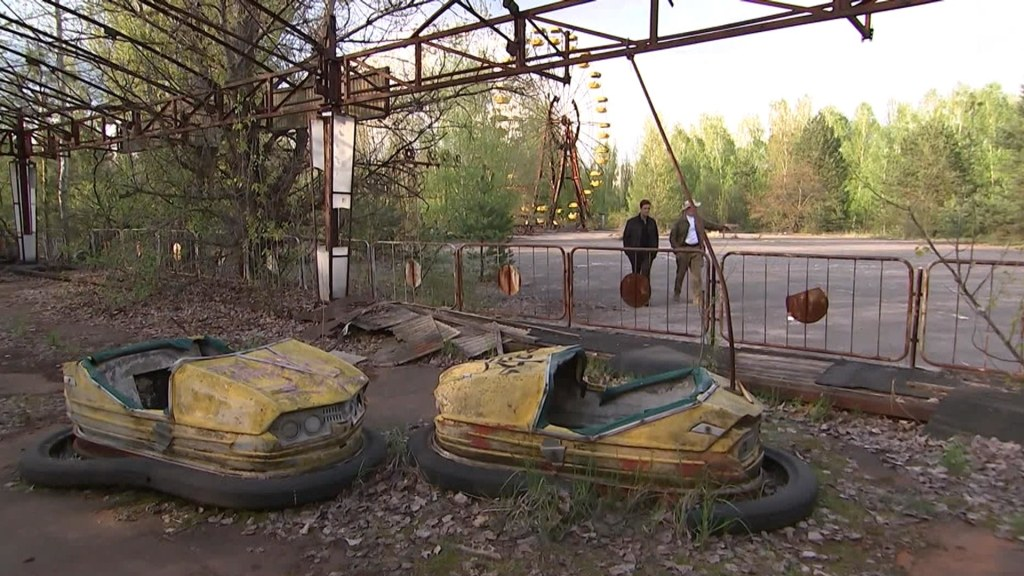

/background/000116.jpg


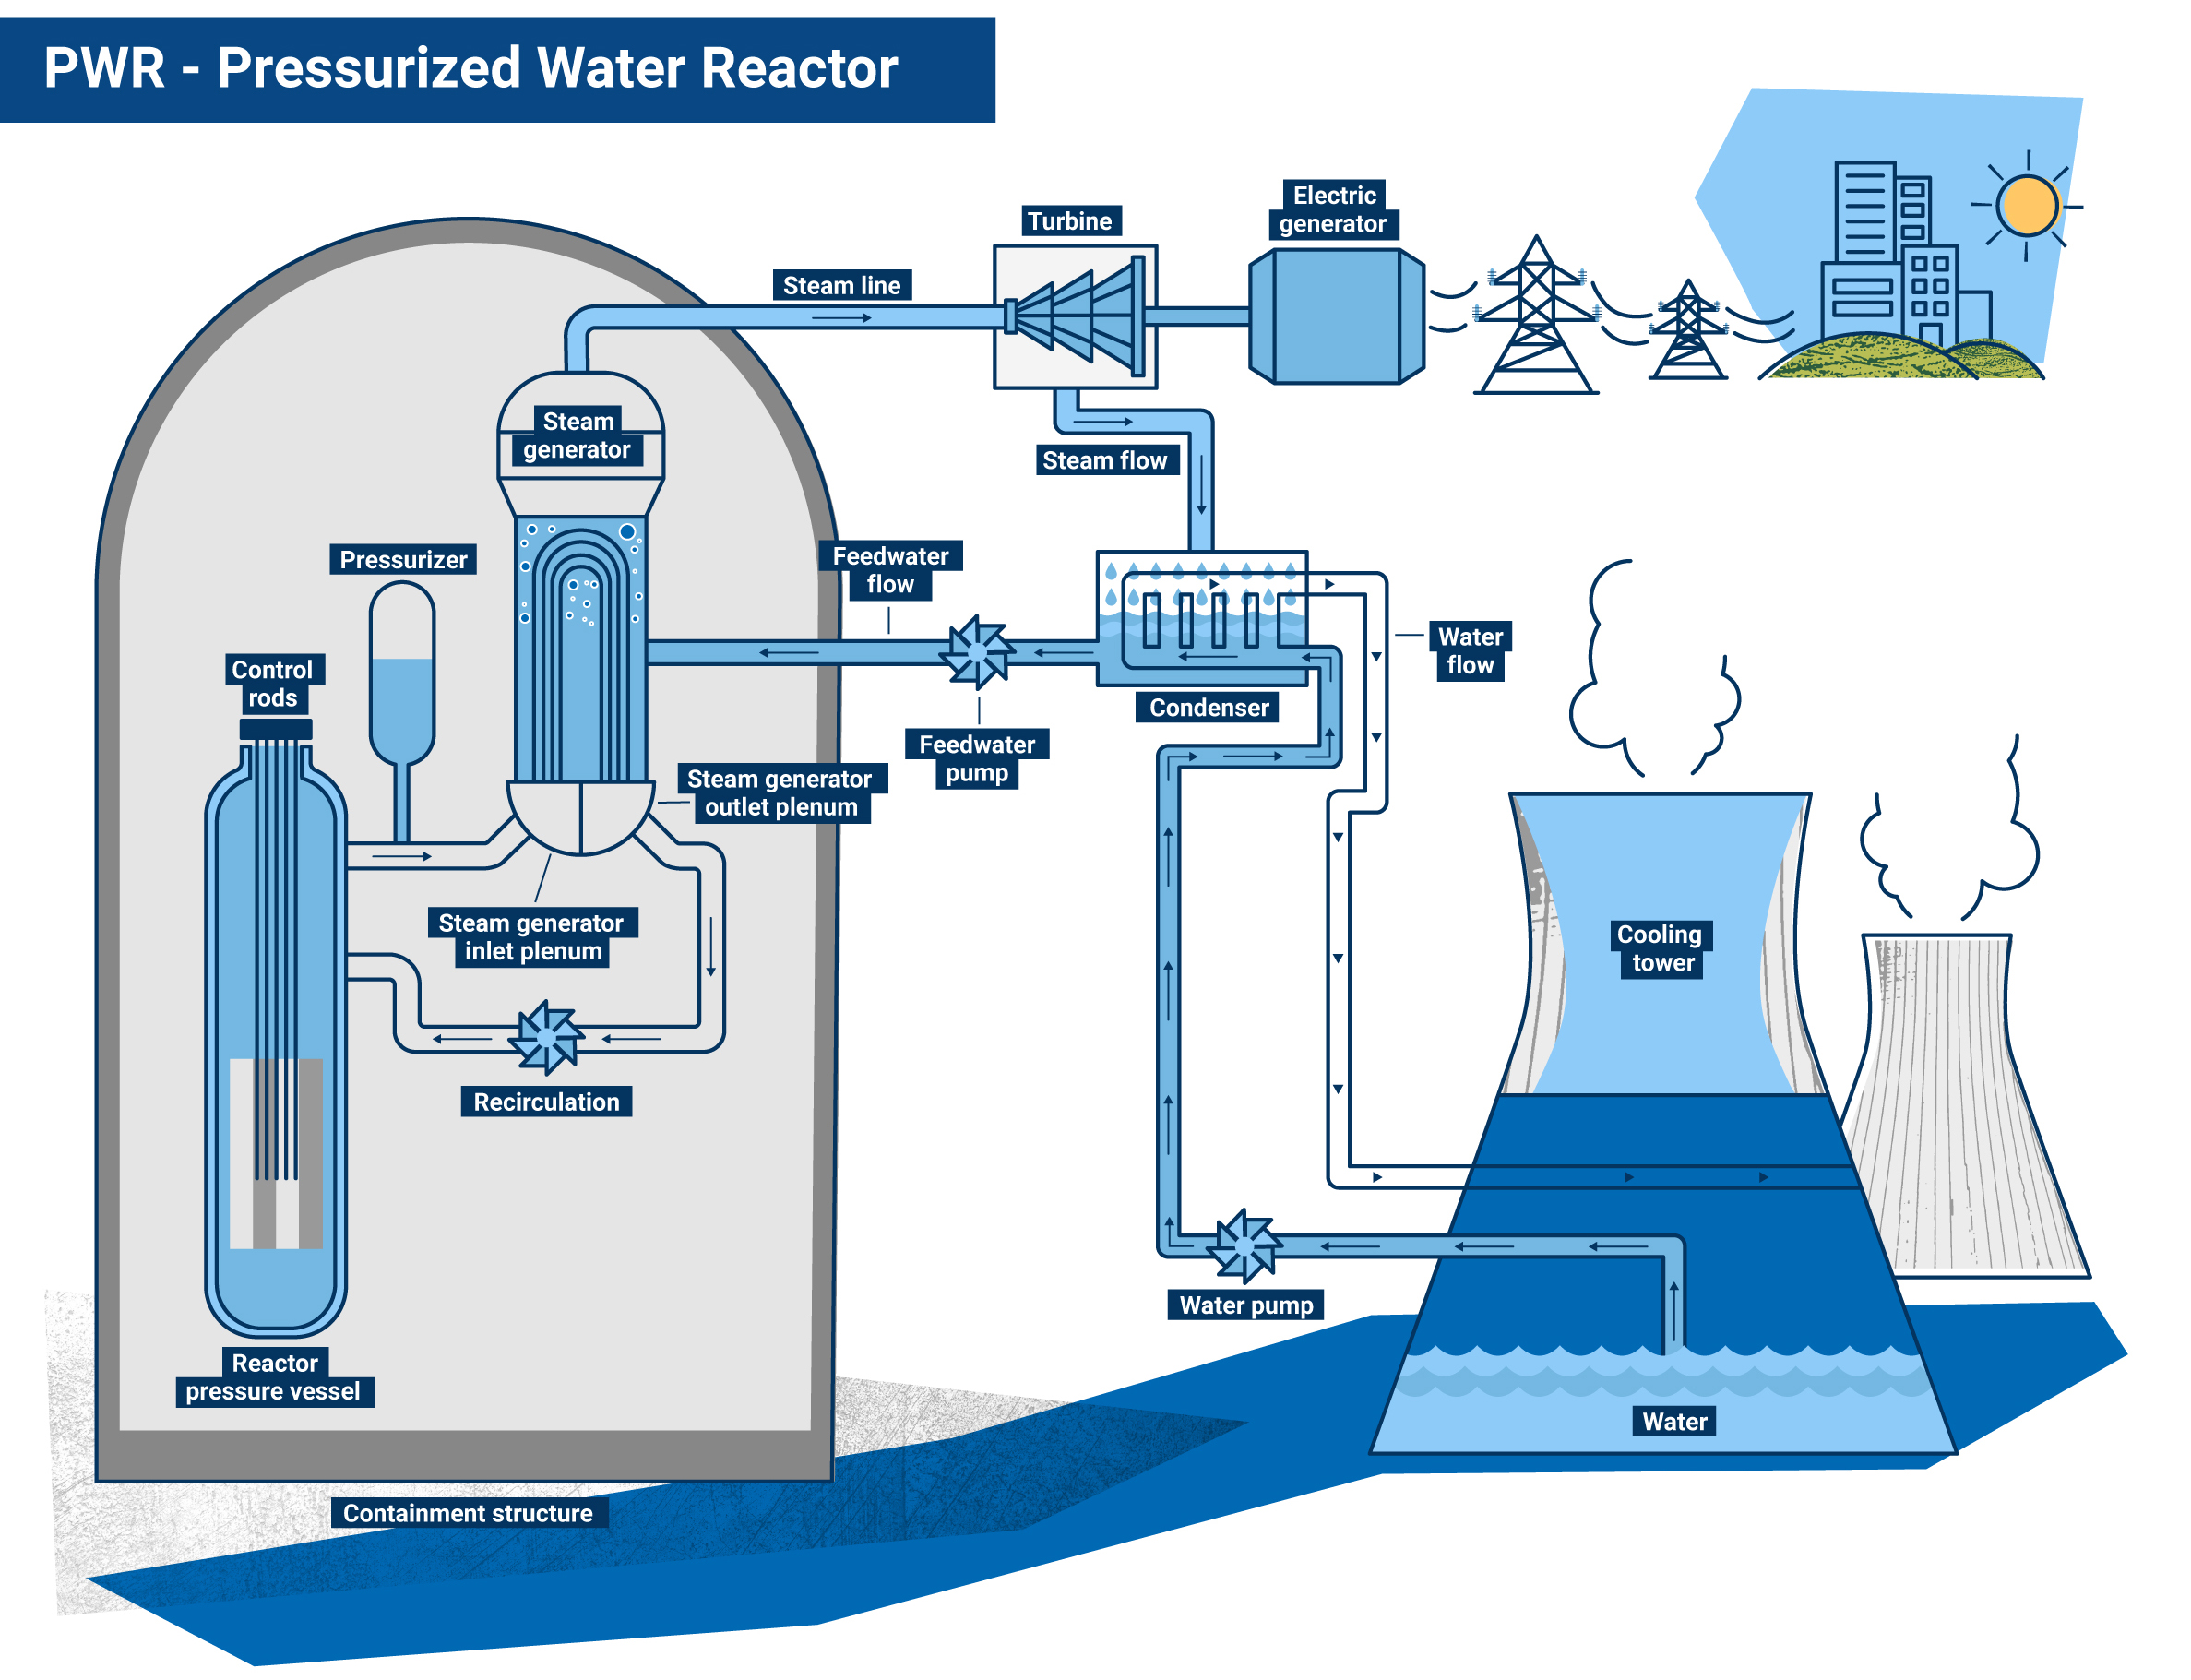

/background/000090.jpg


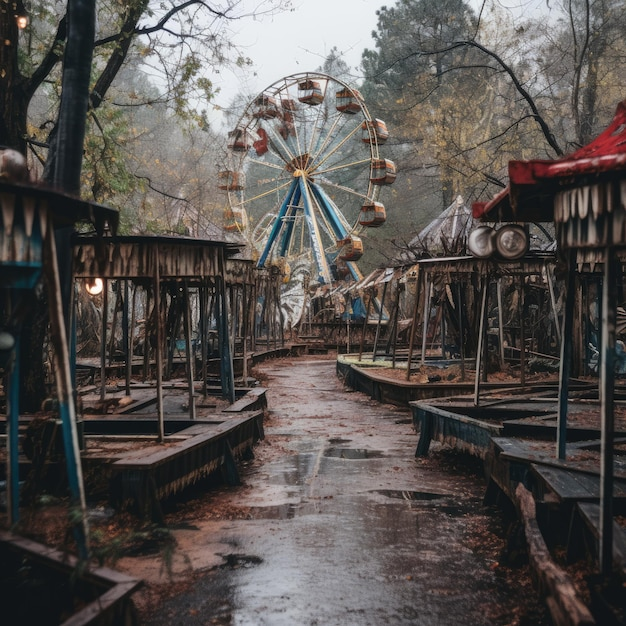

In [4]:
directory = 'background'
from os import walk
from IPython.display import Image, display

# Show some of the images, to confirm that they were successfully crawled
def display_sample_images(directory):
    # ADD YOUR CODE HERE
    count=0
    filenames = next(walk(directory), (None, None, []))[2] 
    for filename in filenames:
        print('/'+directory+'/'+filename)
        display(Image(filename=directory+'/'+filename))
        count+=1
        if count == 5:
            break
    pass

display_sample_images(directory)

### 1.3. Create dataset

### Dataset Creation

This is a crucial part of the assignment evaluation. From the selected objects and collected background images, follow these steps to generate your dataset:

1. **Randomly select background images** from your collection.
2. **Insert a single object** (from the three selected) into each background image at a **random location**.
3. **Record the object's coordinates** and create a corresponding bounding box. For example:
   - If an object with height `h` and width `w` is placed at position `(x, y)`, the bounding box should be in one of the following formats:
     - **[x, y, w, h]** or
     - **[x1, y1, x2, y2]**, where `x2 = x1 + w` and `y2 = y1 + h`.
4. If you plan to compare your custom model with a YOLO model, use the **YOLO bounding box format**:
   - `[(x + w/2)/image_width, (y + h/2)/image_height, w/image_width, h/image_height]`, where `image` refers to the background image dimensions.
5. **Save the generated dataset**, as it will be used for training your custom model and fine-tuning the existing object detection model.
6. **Wrap the dataset creation** in a **PyTorch Dataset class** for easier data handling and model training.
7. **Split the dataset** into training, validation, and test sets to evaluate your model effectively.


In [ ]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import os
import numpy as np
import urllib.request
import time
#force garbage collection to free memory
import gc
#Defines here!#########################################################################################
#number of objects
num_objects=3
#width of the objects
objects_width=100
#height of the objects
objects_height=100
#Urls to the 3 images of the objects 
urls = ('https://raw.githubusercontent.com/highpn/images/refs/heads/master/plushiefox-removebg-preview.png','https://raw.githubusercontent.com/highpn/images/refs/heads/master/plushiebear-removebg-preview.png','https://raw.githubusercontent.com/highpn/images/refs/heads/master/plushieduck-removebg-preview.png') 
#######################################################################################################

#Function to get the images of the 3 objects from my page
def image_url_to_numpy(url):
    # Fetch the image from the URL
    with urllib.request.urlopen(url) as response:
        image_data = response.read()
        
    # Create a matplotlib figure
    image = plt.imread(urllib.request.urlopen(url), format='jpg')
    
    # Convert to a NumPy array (image is already in NumPy array format)
    image_array = np.array(image)
    
    return image_array

#List of object images
object_images=[]

#Create list of object images
for url in urls:
    image_array=(image_url_to_numpy(url))
    object_images.append(image_array)
#######################################################################################################
def createDataset(root_dir, dataset_name, split, img_size, num_images):
    #This my own function... It creates and saves a dataset in the following format:
    # root/
    #     dataset/
    #             train/
    #                   images/
    #                         00001.jpg
    #                   labels/
    #                         00001.txt with the content [class yolo_x, yolo_y, yolo_w, yolo_h] following the yolo format
    #             val
    #...
    # ADD YOUR CODE HERE
    count=0
    background_names = next(os.walk(dataset_name), (None, None, []))[2] 
    for i in range(num_images):
        #Save ram
        gc.collect()
        #Save ram
        plt.close('all')
        background_name = background_names[np.random.randint(0,len(background_names))]
        count+=1
        #Get the the current working directory and randomly select a background from the background directory with a random range from first background to last
        background_image = mpimg.imread(os.getcwd()+'/'+dataset_name+'/'+background_name,format='jpg')
        fig, ax = plt.subplots()
        ax.imshow(background_image,extent=[0, img_size[0], img_size[1], 0])
        #Set random position for the randomly selected objects 
        object_xpos=np.random.randint(0,img_size[0]-objects_width)
        object_ypos=np.random.randint(0,img_size[1]-objects_width)
        object_number=np.random.randint(0,num_objects)
        
        #Set the position and size of the randomly selected objects 
        ax.imshow(object_images[object_number], extent=[object_xpos, object_xpos+objects_width, object_ypos+objects_height, object_ypos])
        plt.xlim(0,img_size[0])
        plt.ylim(img_size[1],0)
        #save results into the specified directories
        if not os.path.exists(root_dir):
            os.makedirs(root_dir)
        if not os.path.exists(root_dir+'/'+split):
            os.makedirs(root_dir+'/'+split)
        if not os.path.exists(root_dir+'/'+split+'/images/'):
            os.makedirs(root_dir+'/'+split+'/images/')
        del background_image
        fig.savefig(os.path.join(os.getcwd()+'/'+root_dir+'/'+split+'/'+'images/', str(count)), bbox_inches='tight') 
        #Save ram
        fig.delaxes(ax)
        #Save ram
        plt.close(fig)
        
    pass

createDataset('dataset', 'background', split='train', img_size=(640,640), num_images=5000) #5000
createDataset('dataset', 'background', split='val', img_size=(640,640), num_images=1000)  #1000
createDataset('dataset', 'background', split='test', img_size=(640,640), num_images=200)

In [133]:
# ADD YOUR CODE HERE

class ObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, split='train', num_classes=3, transform=None):
        self.root_dir = root_dir
        self.split_dir = os.path.join(root_dir, split)
        self.image_dir = os.path.join(self.split_dir, 'images')
        self.label_dir = os.path.join(self.split_dir, 'labels')
        self.image_filenames = sorted(os.listdir(self.image_dir))
        self.transform = transform
        self.num_classes = num_classes

    def __len__(self):
        pass

    def __getitem__(self, idx):
        pass

        if self.transform:
            pass

        # return image, torch.tensor(category), torch.tensor(bbox) #generous hint

NameError: name 'Dataset' is not defined

In [117]:
root_dir = 'dataset'
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = ObjectDetectionDataset(root_dir, split='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)

val_dataset = ObjectDetectionDataset(root_dir, split='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4, pin_memory=True)


test_dataset = ObjectDetectionDataset(root_dir, split='test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4, pin_memory=True)

NameError: name 'transforms' is not defined

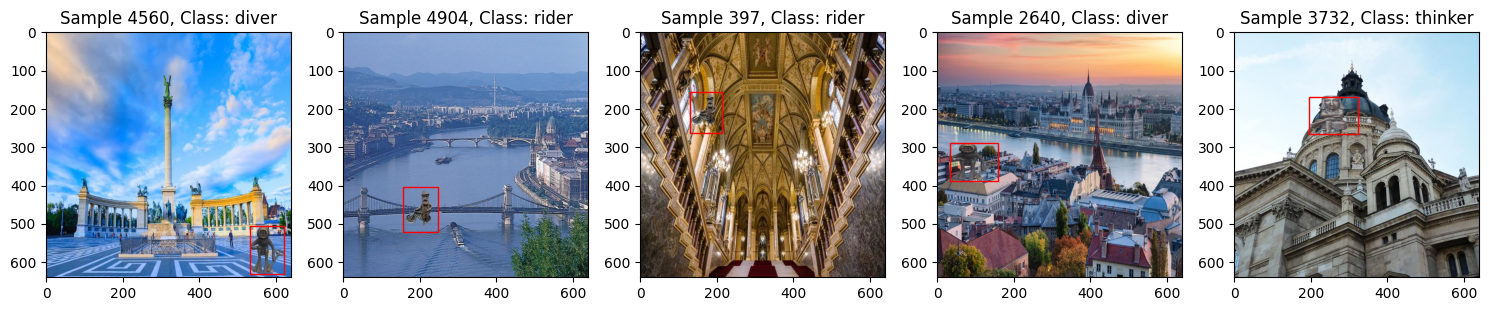

In [ ]:
# Show some visualizations of the created dataset
def visualize_dataset(dataset):
    # ADD YOUR CODE HERE
    pass

visualize_dataset(train_dataset)

### 2. MODELS

In this assignment, you are tasked with building your own custom object detection model and comparing its performance against an existing object detection model.


### 2.1. Custom Object Detection model

### Create a Convolutional Neural Network (CNN) Architecture

Design a CNN-based architecture that includes a **backbone for feature extraction** and two output branches:

- One for **class probabilities** (with output size equal to the number of object classes, e.g., 3).
- Another for **bounding box regression** (with size 4 for the box coordinates: x, y, w, h, or in your chosen format).

This is the core evaluation of the assignment. Experiment with different layers, hyperparameters, and regularization techniques to optimize the model's performance.


In [162]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# ADD YOUR CODE HERE

class CustomModel(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomModel, self).__init__()
        # Define custom backbone
        # Detection layers

    def forward(self, x):
        pass
        # return class_probs, bbox_regression

In [ ]:
dummy_image = torch.randn(1, 3, 640, 640).to(device)
num_classes = 3

model = CustomModel(num_classes).to(device)
cls_output, bbox_output = model(dummy_image)

print("Class Output Shape:", cls_output.shape)
print("Bounding Box Output Shape:", bbox_output.shape)

### 2.2. Train Your Model

Carefully choose key components like the **optimizer**, **loss function**, **number of epochs**, and **regularization techniques**. Ensure you're optimizing both **classification loss** and **bounding box regression loss**.

Monitor for signs of **overfitting** or **underfitting** by tracking how the loss evolves across epochs. The loss should consistently decrease as training progresses. Save and log these losses for visualization and further analysis.


**Example Plot**:

<a href="https://ibb.co/bzmMxJY"><img src="https://i.ibb.co/t8KTSXn/download.png" alt="download" border="0"></a>

In [ ]:
# ADD YOUR CODE HERE
optimizer = None
class_loss_fn = None
bbox_loss_fn = None

def train_model(model, train_loader, val_loader, optimizer, class_loss_fn, bbox_loss_fn, num_epochs=10):
    train_losses = []
    val_losses = []
    # ADD YOUR CODE HERE
    pass

def plot_losses(train_losses, val_losses):
    # ADD YOUR CODE HERE
    pass

train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, class_loss_fn, bbox_loss_fn, num_epochs=10)
plot_losses(train_losses, val_losses)

### 2.3. Evaulate and do inference with the trained custom model

Choose **at least 3 metrics** to evaluate your object detection model. These could include:

- **Precision**: The proportion of correctly predicted positive instances (objects detected) out of all instances classified as positive.
- **Recall**: The proportion of correctly predicted positive instances out of all actual positive instances (objects present in the image).
- **F1-Score**: The harmonic mean of Precision and Recall, balancing false positives and false negatives.
- **IoU (Intersection over Union)**: Measures the overlap between the predicted bounding box and the ground truth bounding box.
- **mAP (mean Average Precision)**: This is one of the most common evaluation metrics for object detection. It averages precision at different recall thresholds across all object classes.
  
Additionally, you can assess:
- **Inference speed**: Time taken by the model to process a single image.
- **Number of parameters**: The total number of trainable parameters in the model.
- **Model size**: The disk size of the trained model.

### Show Performance Metric Visualizations

- Visualize the chosen metrics (e.g., **Precision, Recall, F1-Score, IoU, mAP**) over different epochs to demonstrate the improvement in the model’s performance.
- Plot losses (both classification loss and localization loss) to show how they decrease throughout training.

### Show Some Predictions of Your Trained Model

- Display sample images with **predicted bounding boxes** and compare them to the ground truth.
- Highlight the values of **Precision, Recall, IoU**, or other relevant metrics for each displayed prediction, giving a clear view of the model's performance.
  
You can also use **WandB (Weights and Biases)** or **TensorBoard** for more detailed logging and tracking of these metrics and visualizations.


In [ ]:
def evaluate_test_set(model, test_loader, device):
    model.eval()
    # ADD YOUR CODE
    pass

precision, recall, mAP = evaluate_test_set(model, test_loader, device)

In [ ]:
def visualize_predictions(model, test_dataset):
    # ADD YOUR CODE HERE
    pass

visualize_predictions(model, test_dataset)

### 2.4. Load an Existing Object Detection Model

We recommend using the latest **YOLO** version, but you are free to choose any other **PyTorch-based** object detection model.


In [ ]:
# ADD YOUR CODE HERE

### 2.5. Fine-tune the existing object detection model
If you choose to use **YOLO**, training the model can be done easily by providing a `data.yaml` file (which follows a specific format, check the official GitHub repository for details) and running the training script.

For example, you can run YOLO from the command line with:

```bash
!yolo task=detect mode=train data=datasets/data.yaml model=yolov8n.yaml epochs=200 imgsz=640
```

Make sure to show the losses and metrics visualizations. By default, YOLO should **verbose** those.

In [ ]:
# ADD YOUR CODE HERE

### 2.6 Evaluate the existing object detection model
**Compare the performance** of your custom model and the YOLO model, ensuring both are evaluated on the **same subset of images** using the **same metrics** chosen in **Step 2.3** (e.g., Precision, Recall, F1-Score, IoU, mAP).


In [ ]:
# ADD YOUR CODE HERE

# 3. COMPARISON
**Compare the performance** of your custom model and the YOLO model, ensuring both are evaluated on the **same subset of images** for a fair comparison. Key metrics to include:

- **Precision**
- **Recall**
- **F1-Score**
- **IoU (Intersection over Union)**
- **mAP (mean Average Precision)**

### Visualize Predictions

- Show predictions from both models on the same images.
- Include bounding boxes, class labels, and relevant metrics like IoU or Precision.

### Explain Differences

- Discuss why one model may perform better than the other, considering architecture, dataset complexity, or fine-tuning.

### Improve Custom Model

- Suggest improvements such as better data augmentation, model architecture adjustments, hyperparameter tuning, or more training data.
- Explore **Transfer Learning**, **learning rate scheduling**, or new optimizers for better performance.


In [ ]:
# ADD YOUR CODE HERE